In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [145]:
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)

# 이탈 기준 설정하기

## RFM
R: Recency 최근 주문일
F: Frequency 주문수
M: Monetary 총 구매 금액

In [161]:
customers_df = pd.read_csv('data/olist_customers_dataset.csv')
orders_df = pd.read_csv('data/olist_orders_dataset.csv')
order_payments_df = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('data/olist_order_reviews_dataset.csv')
order_items_df = pd.read_csv('data/olist_order_items_dataset.csv')
products_df = pd.read_csv('data/olist_products_dataset.csv')
product_category_name_df = pd.read_csv('data/product_category_name_translation.csv')

print(customers_df.shape, orders_df.shape, order_payments_df.shape)

(99441, 5) (99441, 8) (103886, 5)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [162]:
# 병합할 테이블과 중복 컬럼 확인하기: customer_id
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [163]:
# orders_df + customers_df 병합
orders_customers_merged = pd.merge(
    orders_df,
    customers_df[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)
orders_customers_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6


In [83]:
# 병합할 테이블과 중복 컬럼 확인하기: order_id
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [84]:
# order_payments_df + orders_customers_merged
payments_orders_customers_merged = pd.merge(
    order_payments_df,
    orders_customers_merged[['order_id', 'customer_unique_id', 'order_purchase_timestamp']],
    on='order_id',
    how='left'
)
payments_orders_customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  103886 non-null  object 
 1   payment_sequential        103886 non-null  int64  
 2   payment_type              103886 non-null  object 
 3   payment_installments      103886 non-null  int64  
 4   payment_value             103886 non-null  float64
 5   customer_unique_id        103886 non-null  object 
 6   order_purchase_timestamp  103886 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ MB


In [85]:
# RFM
# - R: order_purchase_timestamp 최근 구매 경과일
# - F: order_id 구매 빈도수
# - M: payment_value 총 구매금액
rfm_df = payments_orders_customers_merged.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': 'max',
    'order_id': pd.Series.nunique,
    'payment_value': 'sum'
})
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96095 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    96095 non-null  object 
 1   Frequency  96095 non-null  int64  
 2   Monetary   96095 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ MB


In [86]:
# 날짜형 변경 후 경과일 계산
rfm_df['Recency'] = pd.to_datetime(rfm_df['Recency'])
max_date = rfm_df['Recency'].max()
rfm_df['Recency'] = max_date - rfm_df['Recency']

rfm_df['Recency'] = rfm_df['Recency'].dt.days +1
rfm_df.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
0000f46a3911fa3c0805444483337064,586,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
0004aac84e0df4da2b147fca70cf8255,337,1,196.89


### F_score

In [87]:
# 빈도수 구간 설정 및 범주 이름 지정
bins = [0, 2, 5, float('inf')] # 0~2: lowl / 3~5: mid / 6~: high
labels = ['low', 'mid', 'high']

# 구간화
rfm_df['Frequency_level'] = pd.cut(rfm_df['Frequency'], bins=bins, labels=labels)
rfm_df.head()

,Recency,Frequency,Monetary,Frequency_level
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,low
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,low
0000f46a3911fa3c0805444483337064,586,1,86.22,low
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,low
0004aac84e0df4da2b147fca70cf8255,337,1,196.89,low


In [88]:
# Frequency_level 재정의
f_score_map = {
    'low': 1,
    'mid': 3,
    'high': 5
}
# 카테고리 컬럼을 문자열로 변환 후 매핑
rfm_df.info()
rfm_df['F_score'] = rfm_df['Frequency_level'].astype(str).map(f_score_map).fillna(2).astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 96095 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          96095 non-null  int64   
 1   Frequency        96095 non-null  int64   
 2   Monetary         96095 non-null  float64 
 3   Frequency_level  96095 non-null  category
dtypes: category(1), float64(1), int64(2)
memory usage: 3.0+ MB


### R_score, M_score

In [89]:
# 분위수 구간 계산 (NaN 발생 대비 + 분위수 구간 부족 대비)
for col in ['Recency', 'Monetary']:
    try:
        rfm_df[col[0] + '_quantile'] = pd.qcut(
            rfm_df[col],
            5,
            labels=False,
            duplicates='drop'
        )
    except ValueError:
        # 전부 동일하거나 분위수 계산 불가한 경우 → 값 전체를 중간값으로 처리
        rfm_df[col[0] + '_quantile'] = 2

# NaN이 생긴 경우 기본값 2로 대체
rfm_df[['R_quantile', 'M_quantile']] = rfm_df[['R_quantile', 'M_quantile']].fillna(2)

# RFM 점수 계산
rfm_df['R_score'] = (5 - rfm_df['R_quantile']).astype(int)  # Recency는 낮을수록 높게
rfm_df['M_score'] = (1 + rfm_df['M_quantile']).astype(int)

# 최종 RFM Score 조합
rfm_df['RFM_score'] = (
    rfm_df['R_score'].astype(str) +
    rfm_df['F_score'].astype(str) +
    rfm_df['M_score'].astype(str)
)

# 결과 출력
print(rfm_df[['Recency', 'Frequency', 'Monetary', 'R_score', 'F_score', 'M_score', 'RFM_score']])

                                  Recency  Frequency  Monetary  R_score  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2      161          1    141.90        4   
0000b849f77a49e4a4ce2b2a4ca5be3f      164          1     27.19        4   
0000f46a3911fa3c0805444483337064      586          1     86.22        1   
0000f6ccb0745a6a4b88665a16c9f078      370          1     43.62        2   
0004aac84e0df4da2b147fca70cf8255      337          1    196.89        2   
...                                   ...        ...       ...      ...   
fffcf5a5ff07b0908bd4e2dbc735a684      496          1   2067.42        1   
fffea47cd6d3cc0a88bd621562a9d061      311          1     84.58        3   
ffff371b4d645b6ecea244b27531430a      618          1    112.46        1   
ffff5962728ec6157033ef9805bacc48      169          1    133.69        4   
ffffd2657e2aad2907e67c3e9daecbeb      533          1     71.56        1   

                        

In [90]:
print(rfm_df['R_score'].value_counts(), '\n')
print(rfm_df['F_score'].value_counts(), '\n')
print(rfm_df['M_score'].value_counts(), '\n')

R_score
5    19324
2    19300
4    19299
1    19129
3    19043
Name: count, dtype: int64 

F_score
1    95843
3      241
5       11
Name: count, dtype: int64 

M_score
3    19222
1    19221
2    19219
5    19219
4    19214
Name: count, dtype: int64 



### 이탈 기준

In [91]:
# R <= 2 and F <= 2 인 경우, 이탈
rfm_df['churn'] = rfm_df.apply(
    lambda x: 1 if (x['R_score'] <= 2 and x['F_score'] <= 2) else 0,
    axis=1
)
rfm_df = rfm_df.reset_index()
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,Frequency_level,F_score,R_quantile,M_quantile,R_score,M_score,RFM_score,churn
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,low,1,1,3,4,4,414,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,low,1,1,0,4,1,411,0
2,0000f46a3911fa3c0805444483337064,586,1,86.22,low,1,4,1,1,2,112,1
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,low,1,3,0,2,1,211,1
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,low,1,3,3,2,4,214,1


In [92]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96095 entries, 0 to 96094
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_unique_id  96095 non-null  object  
 1   Recency             96095 non-null  int64   
 2   Frequency           96095 non-null  int64   
 3   Monetary            96095 non-null  float64 
 4   Frequency_level     96095 non-null  category
 5   F_score             96095 non-null  int64   
 6   R_quantile          96095 non-null  int64   
 7   M_quantile          96095 non-null  int64   
 8   R_score             96095 non-null  int64   
 9   M_score             96095 non-null  int64   
 10  RFM_score           96095 non-null  object  
 11  churn               96095 non-null  int64   
dtypes: category(1), float64(1), int64(8), object(2)
memory usage: 8.2+ MB


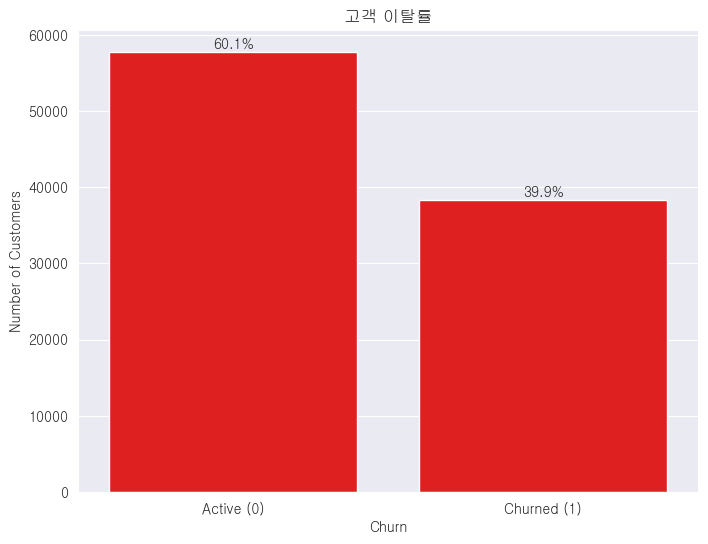

In [93]:
# 시각화
churn_counts = rfm_df['churn'].value_counts().sort_index()
total = churn_counts.sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, color='red')
plt.xticks([0,1], ['Active (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('고객 이탈률')

# 막대 위에 비율 표시
for i, count in enumerate(churn_counts.values):
    percent = count / total * 100
    plt.text(i, count+500, f'{percent:.1f}%', ha='center')

plt.show()

## 배송 변수 병합 및 준비 (* 피처 생성)

In [94]:
# 데이터 불러오기 및 기본 정보 확인
# 전체 데이터 수 99441
orders_df = pd.read_csv('data/olist_orders_dataset.csv',
                        parse_dates=['order_purchase_timestamp',
                                     'order_approved_at',
                                     'order_delivered_carrier_date',
                                     'order_delivered_customer_date',
                                     'order_estimated_delivery_date'
                                     ])
orders_df.info()
print(orders_df.describe())
orders_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
            order_purchase_timestamp              order_approved_at  \
count                          99441                          99281   
mean   2017-12-31 08:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [95]:
# 데이터 확인하기
# 결측치가 없으면 최근 날짜로 확인
# 주문 상태
print('주문 상태: ', orders_df['order_status'].value_counts())
# 주문 완료 날짜
print('주문 완료일: ', orders_df['order_purchase_timestamp'].max(), orders_df['order_purchase_timestamp'].isnull().sum())
# 결제 승인 날짜
print('결제 승인일: ', orders_df['order_approved_at'].max(), orders_df['order_approved_at'].isnull().sum())
# 상품 발송 날짜
print('상품 발송일: ', orders_df['order_delivered_carrier_date'].max(),orders_df['order_delivered_carrier_date'].isnull().sum())
# 예상 배송 날짜
print('배송 예정일: ', orders_df['order_estimated_delivery_date'].max(), orders_df['order_estimated_delivery_date'].isnull().sum())
# 배송 완료 날짜
print('배송 완료일: ', orders_df['order_delivered_customer_date'].max(), orders_df['order_delivered_customer_date'].isnull().sum())

주문 상태:  order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
주문 완료일:  2018-10-17 17:30:18 0
결제 승인일:  2018-09-03 17:40:06 160
상품 발송일:  2018-09-11 19:48:28 1783
배송 예정일:  2018-11-12 00:00:00 0
배송 완료일:  2018-10-17 13:22:46 2965


In [96]:
# 배송 완료가 결측치인 주문들의 상태 확인
orders_df[orders_df['order_delivered_customer_date'].isna()]['order_status'].value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

### 배송 파생 변수 및 필터링

#### order_status - shipped

In [97]:
mark = orders_df[['order_purchase_timestamp', 'order_estimated_delivery_date',
                    'order_delivered_customer_date']].max().max()

# 배송중 - 배송 예정일이 마지막 날짜 데이터보다 전이면 배송 지연
late_shipped = orders_df[
    (orders_df['order_status'] == 'shipped') &
    (orders_df['order_estimated_delivery_date'] < mark)
    ]

print(f'배송 중인데 예정일 지난 주문 수: {len(late_shipped)}')
print(f"전체 shipped 주문 중 비율: {len(late_shipped) / (orders_df['order_status'] == 'shipped').sum() * 100:}")

배송 중인데 예정일 지난 주문 수: 1107
전체 shipped 주문 중 비율: 100.0


#### delivered 의 8개, canceled 의 6개

In [98]:
# delivered 의 8개, canceled 의 6개의 행방.. -> 제거 엔딩(필요가 없음)
issue_delivered = orders_df[
    (orders_df['order_status'] == 'delivered') &
    (orders_df['order_delivered_customer_date'].isna())
]
print(f'"delivere 배송완료"지만 배송일 없는 주문수 {len(issue_delivered)} ')
issue_canceled = orders_df[
    (orders_df['order_status'] == 'canceled') &
    (orders_df['order_delivered_customer_date'].notna())
]
print(f'"canceled 주문취소"지만 배송일 있는 주문수 {len(issue_canceled)} ')

"delivere 배송완료"지만 배송일 없는 주문수 8 
"canceled 주문취소"지만 배송일 있는 주문수 6 


In [99]:
# 분석 불가능한 row 제거 (빼고 남기기) 96456
# 1. delivered인데 - 나머지 다 제거
# 2. 배송 완료일이 null이 아니고 - 배송 완료일이 null인 경우(8)
# 3. 배송 승인일이 null이 아니고
# 4. 고객 주문일도 null이 아니고
delivery_df = orders_df[
    (orders_df['order_status'] == 'delivered') &
    (orders_df['order_delivered_customer_date'].notna()) &
    (orders_df['order_approved_at'].notna()) &
    (orders_df['order_purchase_timestamp'].notna())
]

In [100]:
# 전체 데이터 수 96470
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96456 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96456 non-null  object        
 1   customer_id                    96456 non-null  object        
 2   order_status                   96456 non-null  object        
 3   order_purchase_timestamp       96456 non-null  datetime64[ns]
 4   order_approved_at              96456 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96456 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96456 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### 데이터 병합

In [101]:
# customer_unique_id 99441
customers_df.groupby('customer_unique_id')['customer_id'].nunique().value_counts()
customers_df.groupby('customer_unique_id')['customer_id'].count().sort_values(ascending=False).head(3)
print('customer_id: ', customers_df.value_counts().count())
print('customer_unique_id: ', customers_df['customer_unique_id'].value_counts().count())
print('delivery_data: ', delivery_df.value_counts().count())

customer_id:  99441
customer_unique_id:  96096
delivery_data:  96455


In [102]:
# deliver_df 와 unique_id 병합
delivery_df = delivery_df.merge(
    customers_df[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

In [103]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96456 entries, 0 to 96455
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96456 non-null  object        
 1   customer_id                    96456 non-null  object        
 2   order_status                   96456 non-null  object        
 3   order_purchase_timestamp       96456 non-null  datetime64[ns]
 4   order_approved_at              96456 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96456 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96456 non-null  datetime64[ns]
 8   customer_unique_id             96456 non-null  object        
dtypes: datetime64[ns](5), object(4)
memory usage: 6.6+ MB


#### 파생 변수 생성

In [104]:
# 날짜 타입 확인
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
delivery_df[date_cols].head()

,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [105]:
# 결제 승인 까지 걸린 시간
delivery_df['approval_days'] = (
    delivery_df['order_approved_at'] - delivery_df['order_purchase_timestamp']
).dt.days + 1

# 총 소요시간(구매~배송완료까지)
delivery_df['total_days'] = (
    delivery_df['order_delivered_customer_date'] - delivery_df['order_purchase_timestamp']
).dt.days + 1

# 배송 지연
# delay_days > 0 : 지연배송 이탈 가능성 높음
# delay_days < 0 : 조기배송 이탈 가능성 낮음
delivery_df['delay_days'] = (
    delivery_df['order_estimated_delivery_date'] - delivery_df['order_delivered_customer_date']
).dt.days

#### 변수 병합

In [106]:
# cols_to_drop = ['delay_days', 'total_days', 'approval_days']
# rfm_df.drop(columns=cols_to_drop, inplace=True)
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96095 entries, 0 to 96094
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_unique_id  96095 non-null  object  
 1   Recency             96095 non-null  int64   
 2   Frequency           96095 non-null  int64   
 3   Monetary            96095 non-null  float64 
 4   Frequency_level     96095 non-null  category
 5   F_score             96095 non-null  int64   
 6   R_quantile          96095 non-null  int64   
 7   M_quantile          96095 non-null  int64   
 8   R_score             96095 non-null  int64   
 9   M_score             96095 non-null  int64   
 10  RFM_score           96095 non-null  object  
 11  churn               96095 non-null  int64   
dtypes: category(1), float64(1), int64(8), object(2)
memory usage: 8.2+ MB


In [113]:
# unique_id 에 맞춰 평균으로 처리
delivery_df = delivery_df.groupby('customer_unique_id').agg({
    'delay_days': 'mean',
    'total_days': 'mean',
    'approval_days': 'mean',
}).reset_index()
delivery_df.head()
print(f'deliver_df 평균처리 후 개수: {len(delivery_df)}')

# rfm 테이블 병합
# 배송정보 있는 고객만 체크
rfm_df = rfm_df.merge(
    delivery_df,
    on='customer_unique_id',
    how='inner'
)
rfm_df.head()
print(f'model_df 병합 후 개수: {len(rfm_df)}')

deliver_df 평균처리 후 개수: 93337
model_df 병합 후 개수: 93336


In [158]:
model_df

,customer_unique_id,Recency,Frequency,Monetary,Frequency_level,F_score,R_quantile,M_quantile,R_score,M_score,RFM_score,churn,delay_days,total_days,approval_days,review_flag,review_length
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,low,1,1,3,4,4,414,0,4.0,7.0,1.0,1,111.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,low,1,1,0,4,1,411,0,4.0,4.0,1.0,0,0.0
2,0000f46a3911fa3c0805444483337064,586,1,86.22,low,1,4,1,1,2,112,1,1.0,26.0,1.0,0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,low,1,3,0,2,1,211,1,11.0,21.0,1.0,1,12.0
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,low,1,3,3,2,4,214,1,7.0,14.0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92728,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,2067.42,low,1,4,4,1,5,115,1,26.0,28.0,1.0,0,0.0
92729,fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58,low,1,2,1,3,2,312,0,2.0,31.0,1.0,0,0.0
92730,ffff371b4d645b6ecea244b27531430a,618,1,112.46,low,1,4,2,1,3,113,1,29.0,15.0,1.0,0,0.0
92731,ffff5962728ec6157033ef9805bacc48,169,1,133.69,low,1,1,3,4,4,414,0,13.0,12.0,1.0,1,133.0


In [ ]:
기존 df에다가 order_items_df추가하고 밑에꺼 결합

product_df = products_df.merge(product_category_name_df, on='product_category_name', how='left')
product_df = products_df.merge(order_items_df, on='product_category_name', how='left')




product_df

In [114]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95379 entries, 0 to 95378
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_unique_id  95379 non-null  object  
 1   Recency             95379 non-null  int64   
 2   Frequency           95379 non-null  int64   
 3   Monetary            95379 non-null  float64 
 4   Frequency_level     95379 non-null  category
 5   F_score             95379 non-null  int64   
 6   R_quantile          95379 non-null  int64   
 7   M_quantile          95379 non-null  int64   
 8   R_score             95379 non-null  int64   
 9   M_score             95379 non-null  int64   
 10  RFM_score           95379 non-null  object  
 11  churn               95379 non-null  int64   
 12  review_flag         95379 non-null  int64   
 13  review_length       95379 non-null  float64 
dtypes: category(1), float64(2), int64(9), object(2)
memory usage: 9.6+ MB


In [115]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [116]:
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('')



order_reviews_df['review_flag'] = np.where(
    (order_reviews_df['review_comment_title'] == '') & (order_reviews_df['review_comment_message'] == ''),
    0,
    1
)

order_reviews_df['review_length'] = order_reviews_df['review_comment_message'].apply(lambda x: len(str(x)))

# customer_unique_id 병합
reviews_customers_merged = pd.merge(
    order_reviews_df,
    orders_customers_merged[['order_id', 'customer_unique_id']],
    on='order_id',
    how='left'
)

reviews_customers_merged.head()

reviews_customers_merged.head()

print(f'model_df 병합 후 개수: {len(reviews_customers_merged)}')

model_df 병합 후 개수: 99224


KeyError: 'orders_id'

In [117]:
# unique_id 에 맞춰 평균으로 처리
reviews_customers_merged = reviews_customers_merged.groupby('customer_unique_id').agg({
    'review_flag': 'sum',
    'review_length': 'mean'
}).reset_index()
reviews_customers_merged.head()
print(f'deliver_df 평균처리 후 개수: {len(reviews_customers_merged)}')

# rfm 테이블 병합
# 배송정보 있는 고객만 체크
model_df = rfm_df.merge(
    reviews_customers_merged,
    on='customer_unique_id',
    how='inner'
)
model_df.head()
print(f'model_df 병합 후 개수: {len(model_df)}')

deliver_df 평균처리 후 개수: 95380
model_df 병합 후 개수: 92733


## 모델링

### 데이터 준비

In [119]:
model_df.head()
# model_df.describe()

,customer_unique_id,Recency,Frequency,Monetary,Frequency_level,F_score,R_quantile,M_quantile,R_score,M_score,RFM_score,churn,delay_days,total_days,approval_days,review_flag,review_length
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,low,1,1,3,4,4,414,0,4.0,7.0,1.0,1,111.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,low,1,1,0,4,1,411,0,4.0,4.0,1.0,0,0.0
2,0000f46a3911fa3c0805444483337064,586,1,86.22,low,1,4,1,1,2,112,1,1.0,26.0,1.0,0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,low,1,3,0,2,1,211,1,11.0,21.0,1.0,1,12.0
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,low,1,3,3,2,4,214,1,7.0,14.0,1.0,0,0.0


In [126]:
# 사용 변수 (RFM + 배송관련 변수)
features = ['Frequency', 'Monetary',
            'delay_days', 'total_days', 'approval_days','review_flag','review_length']

# 타겟 변수
target = 'churn'

X = model_df[features]
y = model_df[target]

# 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 데이터 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# pd.DataFrame(X_train_scaled, columns=features).head()
pd.DataFrame(X_train, columns=features).head()

(74186, 7) (74186,)
(18547, 7) (18547,)


,Frequency,Monetary,delay_days,total_days,approval_days,review_flag,review_length
40514,1,92.12,14.0,14.0,1.0,1,38.0
59189,1,296.78,27.0,9.0,1.0,0,0.0
23785,1,90.26,10.0,7.0,1.0,1,108.0
72584,1,77.09,11.0,14.0,1.0,0,0.0
27118,1,135.86,24.0,14.0,1.0,0,0.0


### 모델 학습 및 예측

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'class_weight':['balanced', None],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}
grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid=param_grid, cv=5, scoring='accuracy' )
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_
print('Best params:', grid.best_params_)
print('Best accuracy:', grid.best_score_)
print('Best model:', grid.best_estimator_)

Best params: {'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.6063273363786739
Best model: LogisticRegression(C=0.01, max_iter=500, penalty='l1', solver='liblinear')


In [128]:
# 모델 학습
model = LogisticRegression(
    max_iter=500,
    class_weight='balanced',
    C= 10,
    penalty='l1',
    solver='liblinear'
)
model.fit(X_train_scaled, y_train)

# 모델 예측
y_pred = model.predict(X_test_scaled)
y_pred_best = best_model.predict(X_test_scaled)

### 모델 평가

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.517981344691864
Confusion Matrix: 
 [[5844 5384]
 [3556 3763]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.52      0.57     11228
           1       0.41      0.51      0.46      7319

    accuracy                           0.52     18547
   macro avg       0.52      0.52      0.51     18547
weighted avg       0.54      0.52      0.52     18547



In [130]:
# coef_
model.coef_.shape # (1, 1, 6)
print(model.coef_)

[[-0.08126617 -0.00093016  0.18208097  0.15129716  0.01895848 -0.04878769
   0.02356081]]


         feature  coefficient
2     delay_days     0.182081
3     total_days     0.151297
0      Frequency    -0.081266
5    review_flag    -0.048788
6  review_length     0.023561
4  approval_days     0.018958
1       Monetary    -0.000930


C:\Users\playdata\AppData\Local\Temp\ipykernel_19564\604632286.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='coefficient', y='feature', palette='coolwarm')


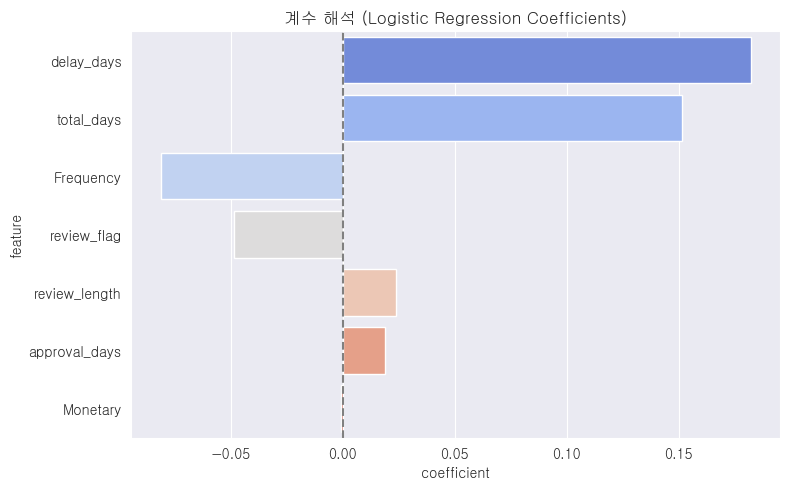

In [131]:
# 계수 해석 (feature 영향)
importance_df = pd.DataFrame({
    'feature': features,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)

print(importance_df)

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='coefficient', y='feature', palette='coolwarm')

plt.title('계수 해석 (Logistic Regression Coefficients)')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [133]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   -- ------------------------------------- 8.1/150.0 MB 45.7 MB/s eta 0:00:04
   -- ------------------------------------- 10.0/150.0 MB 26.9 MB/s eta 0:00:06
   --- ------------------------------------ 12.8/150.0 MB 22.3 MB/s eta 0:00:07
   ----- ---------------------------------- 21.5/150.0 MB 26.6 MB/s eta 0:00:05
   --------- ------------------------------ 34.3/150.0 MB 33.5 MB/s eta 0:00:04
   ------------ --------------------------- 46.9/150.0 MB 38.3 MB/s eta 0:00:03
   --------------- ------------------------ 59.8/150.0 MB 41.8 MB/s eta 0:00:03
   ------------------- -------------------- 71.8/150.0 MB 44.0 MB/s eta 0:00:02
   --------------------- ------------------ 82.3/150.0 MB 44.5 MB/s eta 0:00:02
   ------------------------ --------------- 92.8/150.0 MB 45.6 MB/s eta 0:00:02
   -------------------------- ------------ 103.3/150.0 MB 46.1 MB/s eta 0:00:02
   ----------------------------- --------- 114.8/1

In [134]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 1. 파이프라인 정의
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# 2. GridSearchCV 파라미터 정의 (★ xgb__prefix 필수!)
param_grid = {
    'xgb__n_estimators': [100, 300],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

# 3. GridSearchCV 적용
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',  # 회귀면 'neg_mean_squared_error'
    cv=3,
    n_jobs=-1,
    verbose=1
)

# 4. 학습
grid_search.fit(X_train, y_train)

# 5. 결과 확인
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)




Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\playdata\miniconda3\envs\ai_basic_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:57:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 300, 'xgb__subsample': 1.0}
Best Score: 0.6319251385983841


In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# 예측값
y_pred = grid_search.predict(X_test)

# 정확도
print("Accuracy:", accuracy_score(y_test, y_pred))

# 정밀도
print("Precision:", precision_score(y_test, y_pred))

# 재현율
print("Recall:", recall_score(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

# ROC AUC (이진 분류만)
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

# 분류 리포트 및 혼동행렬
print("\n[Classification Report]")
print(classification_report(y_test, y_pred))

print("\n[Confusion Matrix]")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6335256375694183
Precision: 0.5679333680374805
Recall: 0.2981281595846427
F1 Score: 0.39100439028760864
ROC AUC: 0.6486753065903547

[Classification Report]
              precision    recall  f1-score   support

           0       0.65      0.85      0.74     11228
           1       0.57      0.30      0.39      7319

    accuracy                           0.63     18547
   macro avg       0.61      0.58      0.56     18547
weighted avg       0.62      0.63      0.60     18547


[Confusion Matrix]
[[9568 1660]
 [5137 2182]]


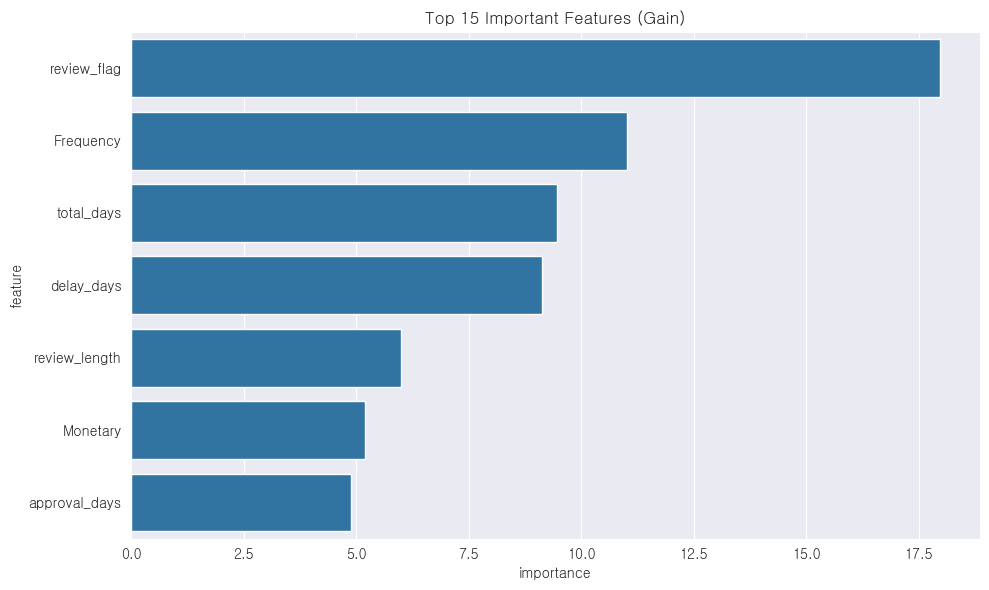

In [138]:
# 3. Feature Importance 추출 및 시각화
xgb_model = best_model.named_steps['xgb']
importances = xgb_model.get_booster().get_score(importance_type='gain')

# f0, f1 등을 실제 변수명으로 매핑
feature_names = X_train.columns  # 또는 X_test.columns, 동일한 열이라면
importances_named = {
    feature_names[int(k[1:])]: v for k, v in importances.items()
}

importance_df = pd.DataFrame({
    'feature': list(importances_named.keys()),
    'importance': list(importances_named.values())
}).sort_values(by='importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df.head(15))
plt.title('Top 15 Important Features (Gain)')
plt.tight_layout()
plt.show()
